<a href="https://colab.research.google.com/github/fpseverino/progetto-ml-ai/blob/main/Main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [252]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import pandas as pd

In [253]:
df = pd.read_csv("Task_21.csv")
df.shape

(145, 134)

In [254]:
# Controlla se ci sono righe duplicate prima di rimuovere l'Id
sample_duplicati = df.duplicated().sum()
if sample_duplicati > 0:
  print("Sample duplicati (con Id):", sample_duplicati)

In [255]:
num_feature = len(df.columns)

# Cancella le colonne "Task" e "Id"
del df["Task"]
del df["Id"]
print("Feature eliminate:", num_feature - len(df.columns))

Feature eliminate: 2


In [256]:
num_sample = df.shape[0]

# Rimuove righe con label uguale a -1
df = df[df["Label"] != -1]
print("Sample eliminati:", num_sample - df.shape[0])

Sample eliminati: 26


In [257]:
# Controlla se ci sono righe duplicate dopo aver rimosso l'Id
sample_duplicati = df.duplicated().sum()
if sample_duplicati > 0:
  print("Sample duplicati (senza Id):", sample_duplicati)

Sample duplicati (senza Id): 1


In [258]:
# Controlla se ci sono valori null
valori_null = df.isnull().sum().sum()
if valori_null > 0:
  print("Valori null:", valori_null)

In [259]:
# Controlla se ci sono valori NaN
valori_nan = df.isna().sum().sum()
if valori_nan > 0:
  print("Valori NaN:", valori_nan)

In [260]:
# Controlla tipi di dato delle colonne
print(df.dtypes)
print("-------------------------------------------")
df.dtypes.value_counts(dropna = False)

mean:velocity:axis-x(in-air)        float64
std:velocity:axis-x(in-air)         float64
iqr:velocity:axis-x(in-air)         float64
mean:velocity:axis-x(on-surface)    float64
std:velocity:axis-x(on-surface)     float64
                                     ...   
number_of_interruptions_relative    float64
Gender                               object
Age                                 float64
Dominant_Hand                        object
Label                                 int64
Length: 132, dtype: object
-------------------------------------------


float64    129
object       2
int64        1
Name: count, dtype: int64

In [261]:
# La feature Age non ha ne valori pari a 0 ne outlier
df["Age"].value_counts(dropna = False)

Age
6.0    91
7.0    24
9.0     3
8.0     1
Name: count, dtype: int64

In [262]:
# Seleziona le feature numeriche (meno Label e Age)
colonne_numeriche = df.select_dtypes(include=[np.number]).columns
colonne_numeriche = colonne_numeriche.drop("Label")
colonne_numeriche = colonne_numeriche.drop("Age") # La feature Age non ha ne valori pari a 0 ne outlier

In [263]:
# Sostituisce tutti i valori numerici pari a 0 con la media della Label

# Per ogni feature numerica
for colonna in colonne_numeriche:
    # calcola la media per ogni Label, escludendo i valori 0
    valori_medi = df[df[colonna] != 0].groupby('Label')[colonna].mean()

    # Per ogni 'Label' nel DataFrame
    for label in df['Label'].unique():
        # se la Label esiste in valori_medi
        if label in valori_medi.index:
            # sostituisci i valori 0 con la media corrispondente per quella Label
            df.loc[(df['Label'] == label) & (df[colonna] == 0), colonna] = valori_medi[label]

In [264]:
df.describe()

,mean:velocity:axis-x(in-air),std:velocity:axis-x(in-air),iqr:velocity:axis-x(in-air),mean:velocity:axis-x(on-surface),std:velocity:axis-x(on-surface),iqr:velocity:axis-x(on-surface),mean:velocity:axis-y(in-air),std:velocity:axis-y(in-air),iqr:velocity:axis-y(in-air),mean:velocity:axis-y(on-surface),...,mean:ratio_of_stroke_durations,std:ratio_of_stroke_durations,iqr:ratio_of_stroke_durations,writing_duration(on-surface),writing_duration_overall,ratio_of_writing_durations,number_of_interruptions,number_of_interruptions_relative,Age,Label
count,119.000000,119.000000,119.000000,119.000000,119.000000,1.190000e+02,119.000000,119.000000,119.000000,119.000000,...,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000
mean,1.092989,6.637259,2.178910,0.591317,0.913416,2.000000e+00,1.366033,8.214521,1.980917,0.686141,...,17.629575,11.137034,11.216164,40.102353,41.844538,48.090299,8.264706,0.169823,6.294118,1.890756
std,0.902524,8.882468,0.402854,0.235574,0.140344,3.904450e-13,0.937642,8.527273,0.425609,0.270053,...,13.989354,7.512442,7.684848,12.893768,14.628517,108.135553,6.419258,0.100668,0.615519,0.407346
min,0.161538,0.544961,2.000000,0.235552,0.644685,2.000000e+00,0.219178,0.624754,0.000000,0.276198,...,0.250000,0.010440,0.010440,14.415000,14.420000,3.880740,2.000000,0.033904,6.000000,0.000000
25%,0.770749,3.144829,2.000000,0.437244,0.831900,2.000000e+00,1.032000,4.683982,2.000000,0.506247,...,7.750566,6.919434,6.126454,31.340000,31.410000,23.796485,4.000000,0.113533,6.000000,2.000000
50%,1.112846,6.987453,2.193548,0.540244,0.897260,2.000000e+00,1.430516,8.678108,2.052083,0.639766,...,16.819949,11.710702,11.844956,39.115000,40.160000,36.806636,8.500000,0.173889,6.000000,2.000000
75%,1.112846,6.987453,2.193548,0.662932,0.957372,2.000000e+00,1.430516,8.678108,2.052083,0.763892,...,16.819949,11.710702,11.844956,48.200000,50.247500,36.806636,8.500000,0.173889,6.000000,2.000000
max,9.382353,77.355247,6.000000,1.585885,1.801404,2.000000e+00,9.970588,82.580318,4.000000,1.930026,...,97.868687,54.992345,58.778139,91.275000,115.030000,1105.375000,46.000000,0.586611,9.000000,2.000000


<Axes: >

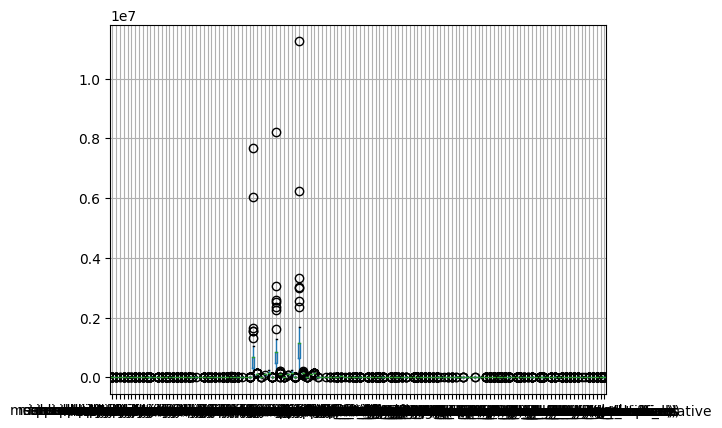

In [265]:
df.boxplot()

In [266]:
# Sostituisce gli outlier con la media della Label

# Per ogni feature numerica
for colonna in colonne_numeriche:
    # Calcola i percentili per ciascuna feature numerica
    q_low = df[colonna].quantile(0.01)
    q_high = df[colonna].quantile(0.99)

    # Calcola la media per ogni Label, escludendo gli outlier
    valori_medi = df[(df[colonna] > q_low) & (df[colonna] < q_high)].groupby('Label')[colonna].mean()

    # Definisci una funzione per sostituire i valori outlier con la media corrispondente
    def sostituisci_outlier(riga):
        label = riga['Label']
        valore = riga[colonna]
        if label in valori_medi.index and (valore <= q_low or valore >= q_high):
            return valori_medi[label]
        else:
            return valore

    # Applica la funzione a tutte le righe
    df[colonna] = df.apply(sostituisci_outlier, axis=1)

In [267]:
df.describe()

,mean:velocity:axis-x(in-air),std:velocity:axis-x(in-air),iqr:velocity:axis-x(in-air),mean:velocity:axis-x(on-surface),std:velocity:axis-x(on-surface),iqr:velocity:axis-x(on-surface),mean:velocity:axis-y(in-air),std:velocity:axis-y(in-air),iqr:velocity:axis-y(in-air),mean:velocity:axis-y(on-surface),...,mean:ratio_of_stroke_durations,std:ratio_of_stroke_durations,iqr:ratio_of_stroke_durations,writing_duration(on-surface),writing_duration_overall,ratio_of_writing_durations,number_of_interruptions,number_of_interruptions_relative,Age,Label
count,119.000000,119.000000,119.000000,119.000000,119.000000,1.190000e+02,119.000000,119.000000,119.000000,119.000000,...,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000
mean,1.006148,5.660187,2.134609,0.580555,0.905694,2.000000e+00,1.294184,7.488960,1.956132,0.672751,...,16.619889,10.756234,10.762100,39.813479,41.390548,37.318650,9.102941,0.165887,6.294118,1.890756
std,0.320089,3.073232,0.087780,0.195808,0.101088,3.327591e-13,0.453077,4.486163,0.370415,0.218808,...,9.417768,5.749379,5.516062,11.144085,12.113262,33.756903,4.072309,0.086356,0.615519,0.407346
min,0.267123,0.680361,2.000000,0.313755,0.728887,2.000000e+00,0.363636,0.771389,0.000000,0.374202,...,1.000000,1.085589,1.085589,16.400000,16.405000,4.284649,4.000000,0.035862,6.000000,0.000000
25%,0.819923,3.364900,2.000000,0.444695,0.833713,2.000000e+00,1.053872,4.928873,2.000000,0.518994,...,8.626780,7.419768,6.931653,31.955000,32.232500,25.280855,8.500000,0.116891,6.000000,2.000000
50%,1.112846,6.987453,2.193548,0.549108,0.902133,2.000000e+00,1.430516,8.678108,2.052083,0.649702,...,16.819949,11.710702,11.844956,39.694764,40.805000,36.806636,8.500000,0.173889,6.000000,2.000000
75%,1.112846,6.987453,2.193548,0.654142,0.954804,2.000000e+00,1.430516,8.678108,2.052083,0.752239,...,16.819949,11.710702,11.844956,47.997500,49.447500,36.806636,9.100000,0.173889,6.000000,2.000000
max,2.169049,16.871146,2.193548,1.460284,1.245485,2.000000e+00,2.727554,26.186697,2.052083,1.614984,...,49.487805,34.960985,33.176471,70.720000,74.185000,314.345524,28.000000,0.451249,9.000000,2.000000


<Axes: >

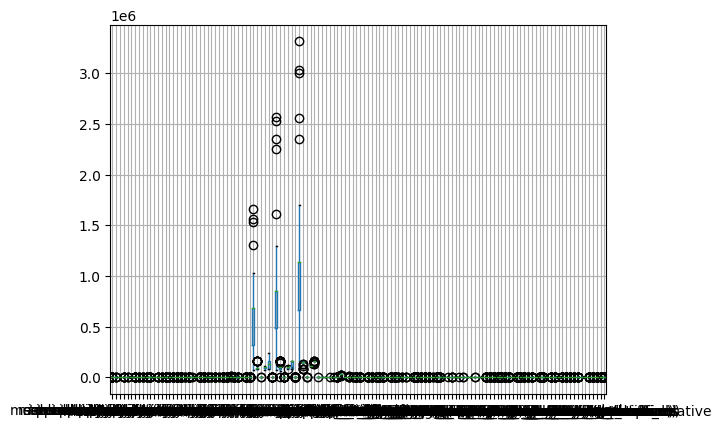

In [268]:
df.boxplot() # Gli outlier sono diminuiti di un ordine di grandezza

In [269]:
# Controllare valori della colonna Gender
print(df['Gender'].value_counts())

# Sostituire le stringhe con valori numerici
df["Gender"] = df.Gender.apply(lambda x: x.replace("Femminile", "0"))
df["Gender"] = df.Gender.apply(lambda x: x.replace("Maschile", "1"))

# Controllare se i valori della colonna Gender sono stati sostituiti correttamente
print("-------------------------")
print(df['Gender'].value_counts())

# I valori rimangono di tipo "object" (stringhe)
print("-------------------------")
print(df.dtypes.value_counts(dropna = False))

Gender
Femminile    64
Maschile     55
Name: count, dtype: int64
-------------------------
Gender
0    64
1    55
Name: count, dtype: int64
-------------------------
float64    129
object       2
int64        1
Name: count, dtype: int64


In [270]:
# Controllare valori della colonna Dominant_Hand
print(df['Dominant_Hand'].value_counts())

# Sostituire le stringhe con valori numerici
df["Dominant_Hand"] = df.Dominant_Hand.apply(lambda x: x.replace("Destra", "0"))
df["Dominant_Hand"] = df.Dominant_Hand.apply(lambda x: x.replace("Sinistra", "1"))

# Controllare se i valori della colonna Dominant_Hand sono stati sostituiti correttamente
print("-------------------------")
print(df['Dominant_Hand'].value_counts())

# I valori rimangono di tipo "object" (stringhe)
print("-------------------------")
print(df.dtypes.value_counts(dropna = False))

Dominant_Hand
Destra      106
Sinistra     13
Name: count, dtype: int64
-------------------------
Dominant_Hand
0    106
1     13
Name: count, dtype: int64
-------------------------
float64    129
object       2
int64        1
Name: count, dtype: int64


In [271]:
# Controlla se ci sono valori NaN
valori_nan = df.isna().sum().sum()
if valori_nan > 0:
  print("Valori NaN:", valori_nan)

In [272]:
# Controlla se ci sono valori null
valori_null = df.isnull().sum().sum()
if valori_null > 0:
  print("Valori null:", valori_null)

In [273]:
# Controlla se ci sono righe duplicate
sample_duplicati = df.duplicated().sum()
if sample_duplicati > 0:
  print("Sample duplicati):", sample_duplicati)

Sample duplicati): 1
